Nama : Dewa Putra Haryono

Dataset kaggle : animal10

In [1]:
import tensorflow as tf

Download dataset dengan kaggle API

In [2]:
#install kaggle
!pip install -q kaggle

In [3]:
# upload file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dewaph","key":"bbe8f6e824d20d3d969190b00200f997"}'}

In [4]:
# buat direktori dan copy kaggle.json
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
# ubah permission file kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           9169        298  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           7320        235  1.0              
whenamancodes/students-performance-in-exams                     Students Performance in Exams                  9KB  2022-09-14 15:14:54          12794        241  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 50

In [7]:
#download dataset dari kaggle
!kaggle datasets download -d viratkothari/animal10

100% 584M/585M [00:29<00:00, 21.6MB/s]
100% 585M/585M [00:29<00:00, 21.1MB/s]


In [8]:
#buat direktori
!mkdir animals

In [9]:
#unzip file dataset
!unzip -qq animal10.zip -d animals

In [11]:
import os
os.listdir('/content/animals/Animals-10')

['cat',
 'cow',
 'elephant',
 'horse',
 'dog',
 'butterfly',
 'sheep',
 'spider',
 'squirrel',
 'chicken']

In [33]:
#pilih hewan yang tidak diperlukan
import shutil

hapus_animals = ['cat', 'cow', 'elephant', 'horse', 'butterfly', 'sheep', 'squirrel']

animals = os.path.join('/content/animals/Animals-10')
for x in hapus_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [34]:
#cek kemabali direktori animals
import os
os.listdir('/content/animals/Animals-10')

['dog', 'spider', 'chicken']

In [35]:
print('total gambar ayam :', len(os.listdir('/content/animals/Animals-10/chicken')))
print('total gambar anjing :', len(os.listdir('/content/animals/Animals-10/dog')))
print('total gambar laba-laba :', len(os.listdir('/content/animals/Animals-10/spider')))

total gambar ayam : 3098
total gambar anjing : 4863
total gambar laba-laba : 4821


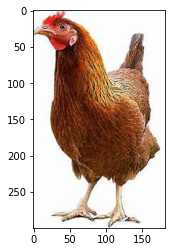

In [37]:
#lihat contoh gambar
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = keras.utils.load_img('/content/animals/Animals-10/chicken/chicken (1).jpeg')
imgplot = plt.imshow(img)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('/content/animals/Animals-10')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set sebagai training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set sebagai validation data

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


In [64]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [65]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 128)      

In [67]:
#buat callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi sudah > 92%")
      self.model.stop_training = True
callbacks = myCallback()

In [68]:
history = model.fit(train_generator,
                    steps_per_epoch = 55,
                    epochs = 50,
                    validation_data = validation_generator,
                    verbose = 2,
                    callbacks = [callbacks])   

Epoch 1/50
55/55 - 26s - loss: 1.2843 - accuracy: 0.3710 - val_loss: 1.0889 - val_accuracy: 0.4031 - 26s/epoch - 479ms/step
Epoch 2/50
55/55 - 25s - loss: 1.0783 - accuracy: 0.3784 - val_loss: 1.0650 - val_accuracy: 0.4059 - 25s/epoch - 458ms/step
Epoch 3/50
55/55 - 25s - loss: 1.0693 - accuracy: 0.3983 - val_loss: 1.0676 - val_accuracy: 0.3663 - 25s/epoch - 460ms/step
Epoch 4/50
55/55 - 27s - loss: 1.0725 - accuracy: 0.4119 - val_loss: 1.0797 - val_accuracy: 0.4027 - 27s/epoch - 489ms/step
Epoch 5/50
55/55 - 25s - loss: 1.0293 - accuracy: 0.4722 - val_loss: 1.0218 - val_accuracy: 0.4849 - 25s/epoch - 453ms/step
Epoch 6/50
55/55 - 25s - loss: 0.9338 - accuracy: 0.5648 - val_loss: 0.9705 - val_accuracy: 0.5339 - 25s/epoch - 458ms/step
Epoch 7/50
55/55 - 25s - loss: 0.8769 - accuracy: 0.6000 - val_loss: 0.8143 - val_accuracy: 0.6297 - 25s/epoch - 462ms/step
Epoch 8/50
55/55 - 25s - loss: 0.8157 - accuracy: 0.6489 - val_loss: 0.8109 - val_accuracy: 0.6755 - 25s/epoch - 457ms/step
Epoch 9/

Prediksi gambar

Saving ayam.jpg to ayam.jpg
1/1 [==============================] - 0s 189ms/step
ayam.jpg
Ayam


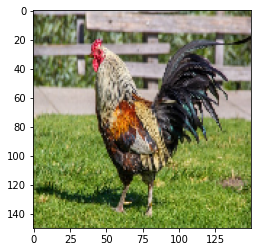

In [69]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  print(fn)
  if classes[0][0]==1:
    print('Ayam')
  elif classes[0][1]==1:
    print('Anjing')
  elif classes[0][2]==1:
    print('Laba-laba')

Saving guk.jpg to guk (1).jpg
1/1 [==============================] - 0s 18ms/step
guk.jpg
Anjing


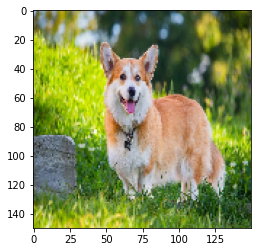

In [71]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  print(fn)
  if classes[0][0]==1:
    print('Ayam')
  elif classes[0][1]==1:
    print('Anjing')
  elif classes[0][2]==1:
    print('Laba-laba')

Saving spid.jpeg to spid.jpeg
1/1 [==============================] - 0s 17ms/step
spid.jpeg
Laba-laba


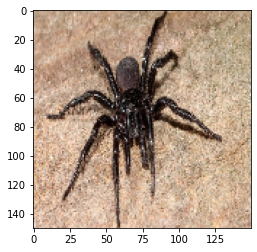

In [72]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10) 
  print(fn)
  if classes[0][0]==1:
    print('Ayam')
  elif classes[0][1]==1:
    print('Anjing')
  elif classes[0][2]==1:
    print('Laba-laba')

membuat plot

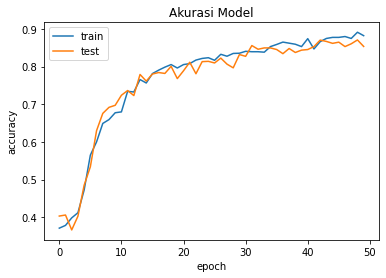

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

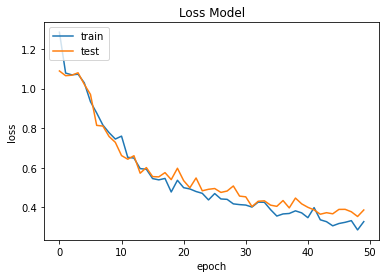

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

simpan model kedalam TF-Lite

In [75]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)